In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
d1 = pd.read_csv("/content/drive/MyDrive/Constraint_Train.csv")
d2 = pd.read_csv("/content/drive/MyDrive/Constraint_Val.csv")

In [131]:
d1.shape

(6420, 3)

In [132]:
d2.shape

(2140, 3)

In [133]:
data = pd.concat([d1, d2]).reset_index(drop = True)
data.shape

(8560, 3)

In [134]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [135]:
# Check the data
data.head()

,id,tweet,label
0,490,New York schools add a COVID-19 vaccine to the...,fake
1,1648,As of September 7 national forecasts suggest f...,real
2,494,“President Trump just announced that the ‘biol...,fake
3,785,Nanavati Hospital Recommends Lemon & Rurmeric ...,fake
4,4207,RT @ICMRDELHI: India has crossed the milestone...,real


In [136]:
data.rename(columns={'tweet': 'text', 'label': 'target'},inplace=True)

In [137]:
data

,id,text,target
0,490,New York schools add a COVID-19 vaccine to the...,fake
1,1648,As of September 7 national forecasts suggest f...,real
2,494,“President Trump just announced that the ‘biol...,fake
3,785,Nanavati Hospital Recommends Lemon & Rurmeric ...,fake
4,4207,RT @ICMRDELHI: India has crossed the milestone...,real
...,...,...,...
8555,3055,Cindy McCain Becomes Second Republican to Join...,fake
8556,4298,Big end of night update. @GavinNewsom put out ...,real
8557,692,Authorities from the Guatemalan Ministry of He...,fake
8558,3047,About 75% of #COVID decedents had co-morbiditi...,real


In [138]:
data.drop(['id'],axis=1,inplace=True)

In [139]:
data

,text,target
0,New York schools add a COVID-19 vaccine to the...,fake
1,As of September 7 national forecasts suggest f...,real
2,“President Trump just announced that the ‘biol...,fake
3,Nanavati Hospital Recommends Lemon & Rurmeric ...,fake
4,RT @ICMRDELHI: India has crossed the milestone...,real
...,...,...
8555,Cindy McCain Becomes Second Republican to Join...,fake
8556,Big end of night update. @GavinNewsom put out ...,real
8557,Authorities from the Guatemalan Ministry of He...,fake
8558,About 75% of #COVID decedents had co-morbiditi...,real


In [140]:
data.target=data.target.map({'fake':1,'real':0})
data.head()

,text,target
0,New York schools add a COVID-19 vaccine to the...,1
1,As of September 7 national forecasts suggest f...,0
2,“President Trump just announced that the ‘biol...,1
3,Nanavati Hospital Recommends Lemon & Rurmeric ...,1
4,RT @ICMRDELHI: India has crossed the milestone...,0


In [141]:
data

,text,target
0,New York schools add a COVID-19 vaccine to the...,1
1,As of September 7 national forecasts suggest f...,0
2,“President Trump just announced that the ‘biol...,1
3,Nanavati Hospital Recommends Lemon & Rurmeric ...,1
4,RT @ICMRDELHI: India has crossed the milestone...,0
...,...,...
8555,Cindy McCain Becomes Second Republican to Join...,1
8556,Big end of night update. @GavinNewsom put out ...,0
8557,Authorities from the Guatemalan Ministry of He...,1
8558,About 75% of #COVID decedents had co-morbiditi...,0


In [142]:
data['target'].value_counts()

0    4480
1    4080
Name: target, dtype: int64

In [143]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()


,text,target
0,new york schools add a covid-19 vaccine to the...,1
1,as of september 7 national forecasts suggest f...,0
2,“president trump just announced that the ‘biol...,1
3,nanavati hospital recommends lemon & rurmeric ...,1
4,rt @icmrdelhi: india has crossed the milestone...,0


In [144]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)
data

,text,target
0,new york schools add a covid19 vaccine to the ...,1
1,as of september 7 national forecasts suggest f...,0
2,“president trump just announced that the ‘biol...,1
3,nanavati hospital recommends lemon rurmeric f...,1
4,rt icmrdelhi india has crossed the milestone o...,0
...,...,...
8555,cindy mccain becomes second republican to join...,1
8556,big end of night update gavinnewsom put out a ...,0
8557,authorities from the guatemalan ministry of he...,1
8558,about 75 of covid decedents had comorbidities ...,0


In [145]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
data.head()

,text,target
0,new york schools add covid19 vaccine mandatory...,1
1,september 7 national forecasts suggest 3300 80...,0
2,“president trump announced ‘biological’ lab wu...,1
3,nanavati hospital recommends lemon rurmeric co...,1
4,rt icmrdelhi india crossed milestone conductin...,0


target
0    4480
1    4080
Name: text, dtype: int64


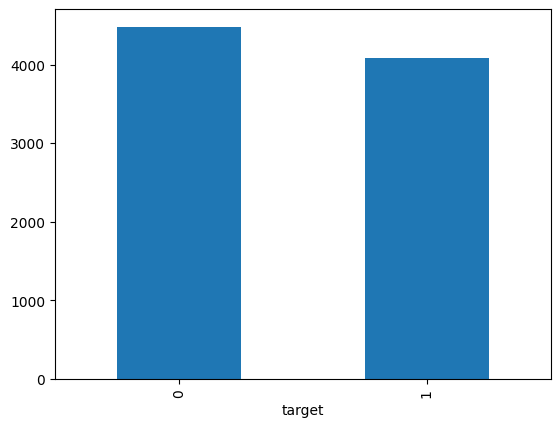

In [147]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

0       new york schools add covid19 vaccine mandatory...
2       “president trump announced ‘biological’ lab wu...
3       nanavati hospital recommends lemon rurmeric co...
10      says covid19 remains air eight hours everyone ...
12      neither viral post coronavirus covid19 unicef ...
                              ...                        
8553    video shows demolished 5g stations hong kong p...
8554    prime minister scottmorrisonmp says australia ...
8555    cindy mccain becomes second republican join jo...
8557    authorities guatemalan ministry health said wo...
8559     justin trudeaus wife released video hospital bed
Name: text, Length: 4080, dtype: object


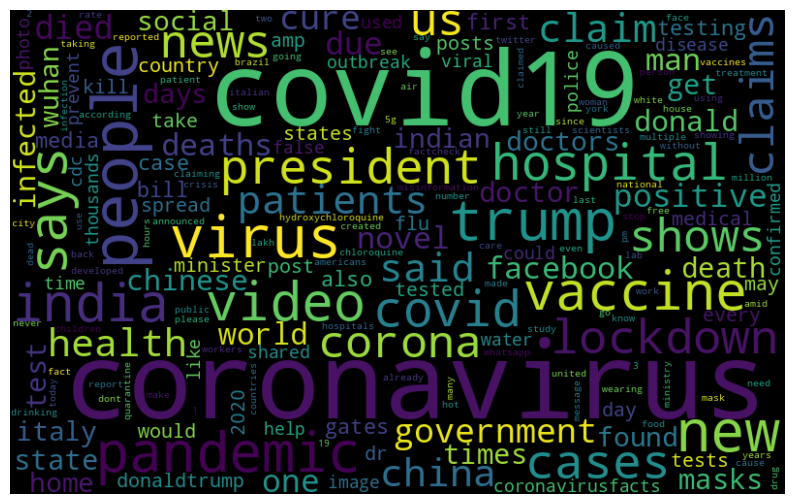

In [148]:
# Word cloud for fake news
from wordcloud import WordCloud
from collections import Counter

fake_data = data[data["target"] == 1]
print(fake_data.text)
all_words = ' '.join([text for text in fake_data.text])

words = Counter(all_words.split())
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,collocations = False).generate_from_frequencies(words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

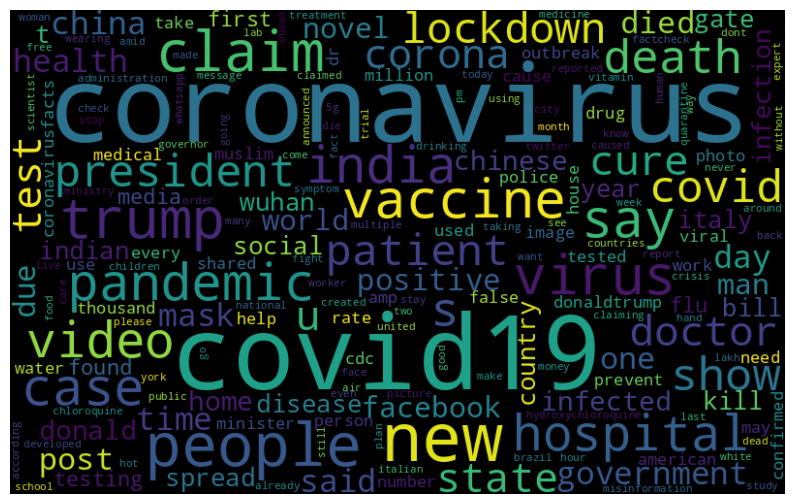

In [149]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [150]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

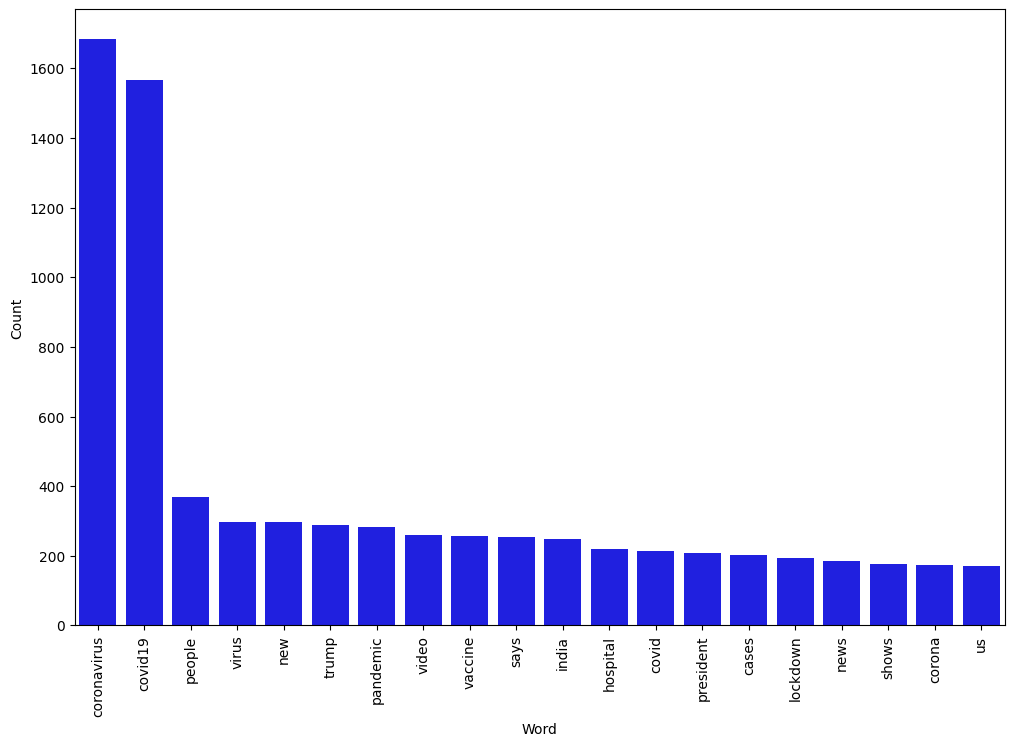

In [151]:
counter(data[data["target"] == 1], "text", 20)

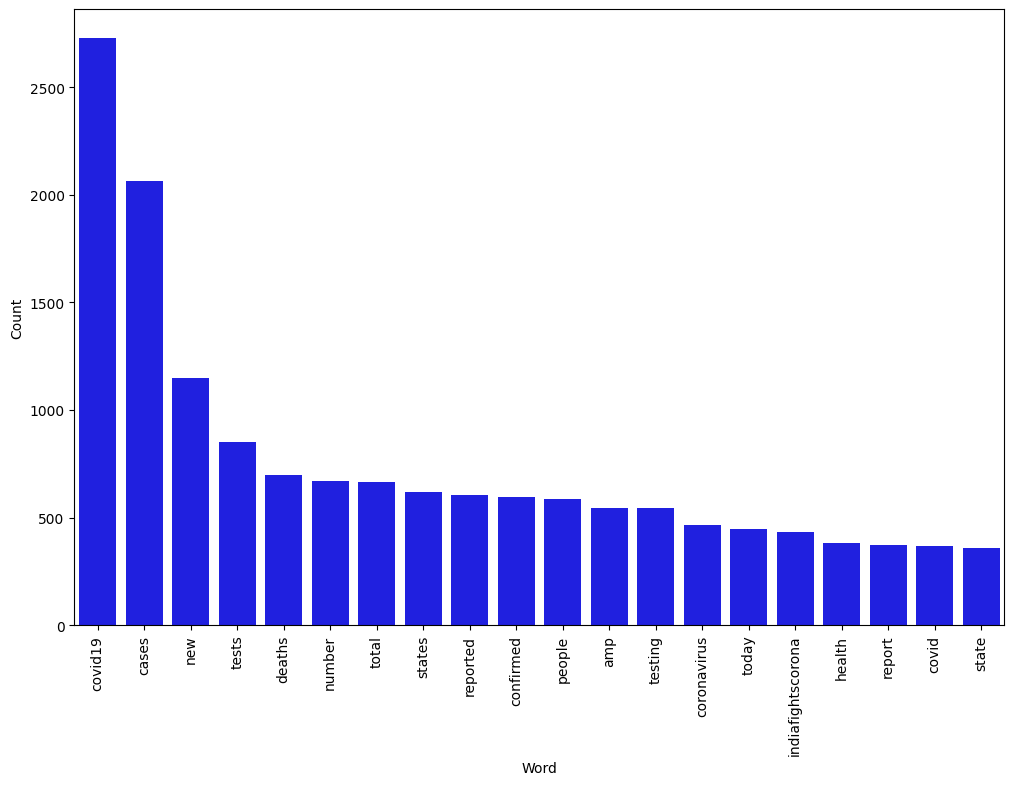

In [152]:
# Most frequent words in real news
counter(data[data["target"] == 0], "text", 20)

In [153]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [154]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [155]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 91.24%


In [156]:
from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.89      0.95      0.92       903
        Real       0.94      0.87      0.90       809

    accuracy                           0.91      1712
   macro avg       0.92      0.91      0.91      1712
weighted avg       0.91      0.91      0.91      1712



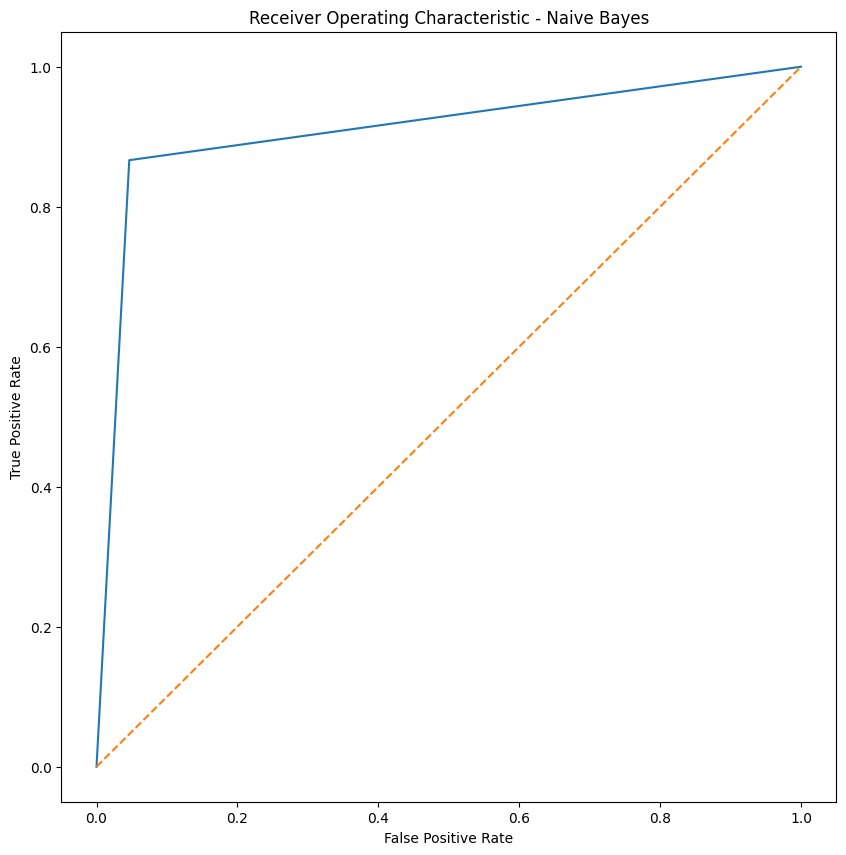

In [157]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,prediction,pos_label=1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(fpr, tpr,'-')
plt.plot([0, 1], ls="--")
fpr_nb=fpr
tpr_nb=tpr
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


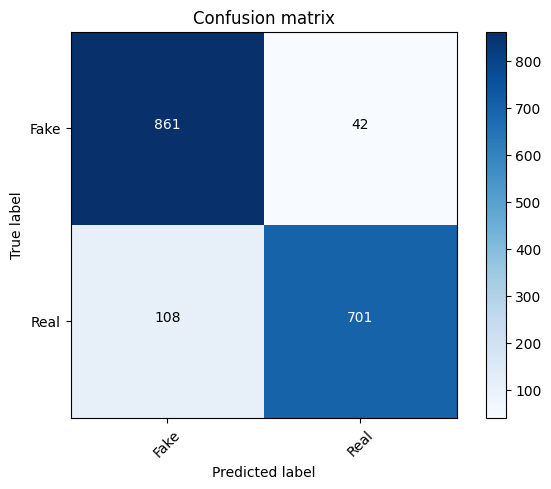

In [158]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [159]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy",random_state=65))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 92.23%


In [160]:
from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.95      0.90      0.92       903
        Real       0.90      0.94      0.92       809

    accuracy                           0.92      1712
   macro avg       0.92      0.92      0.92      1712
weighted avg       0.92      0.92      0.92      1712



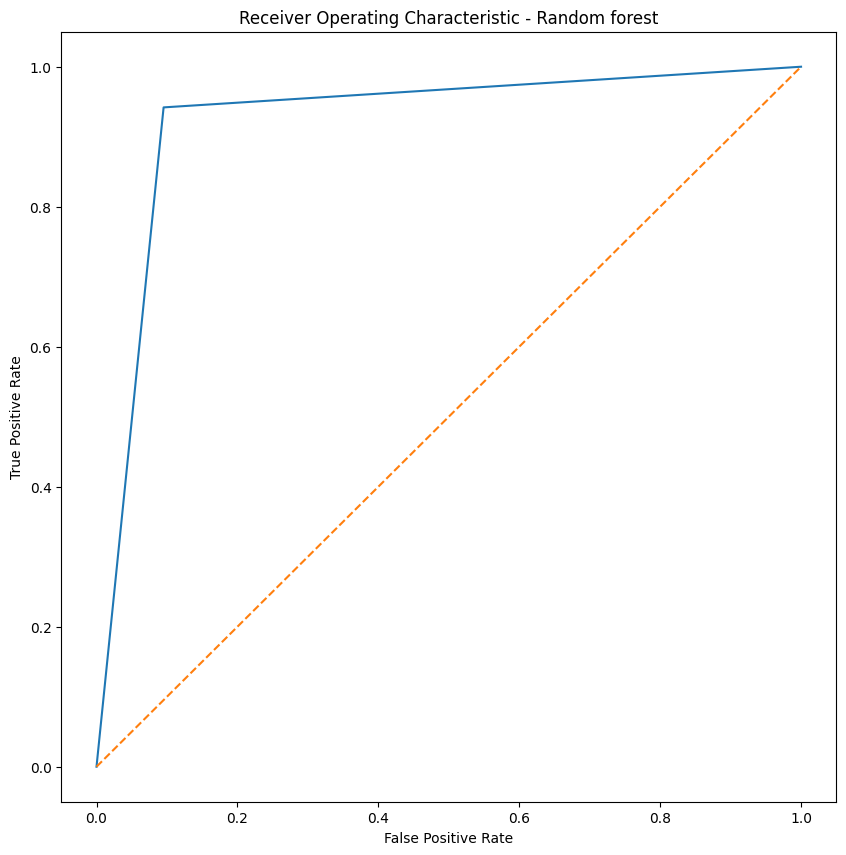

In [161]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,prediction,pos_label=1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random forest')
plt.plot(fpr, tpr,'-')
plt.plot([0, 1], ls="--")
fpr_rf=fpr
tpr_rf=tpr
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


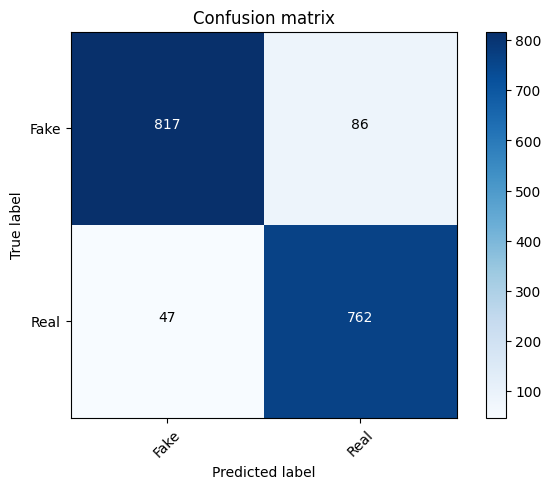

In [162]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [163]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',random_state=65) # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 93.46%


In [164]:
from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.94      0.94      0.94       903
        Real       0.93      0.93      0.93       809

    accuracy                           0.93      1712
   macro avg       0.93      0.93      0.93      1712
weighted avg       0.93      0.93      0.93      1712



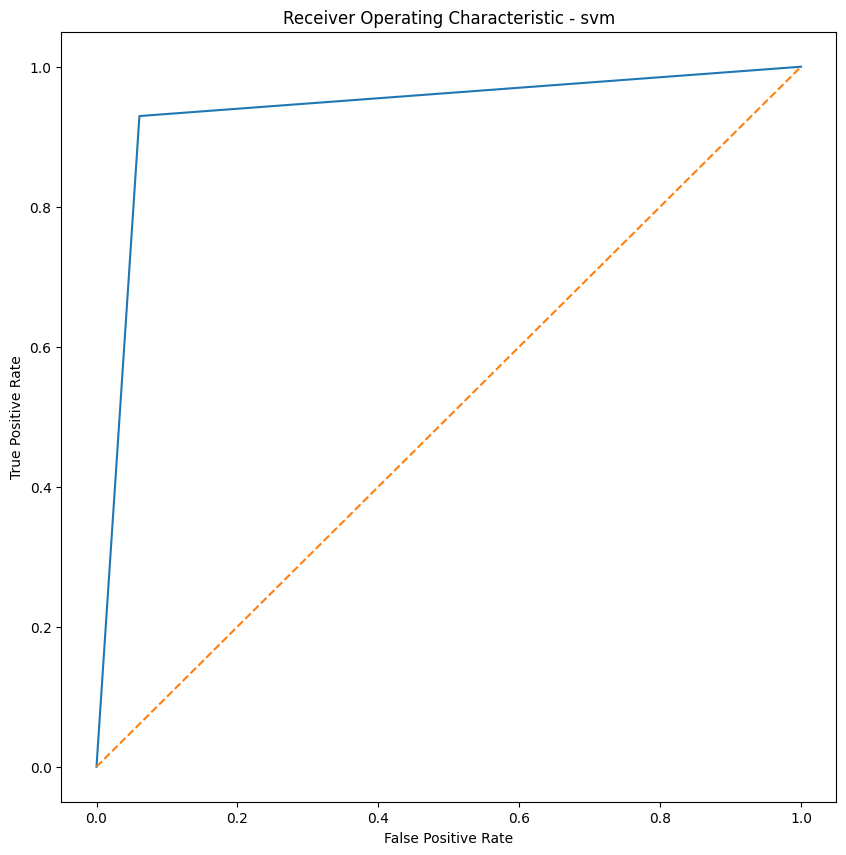

In [165]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,prediction,pos_label=1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - svm')
plt.plot(fpr, tpr,'-')
plt.plot([0, 1], ls="--")
fpr_svm=fpr
tpr_svm=tpr
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


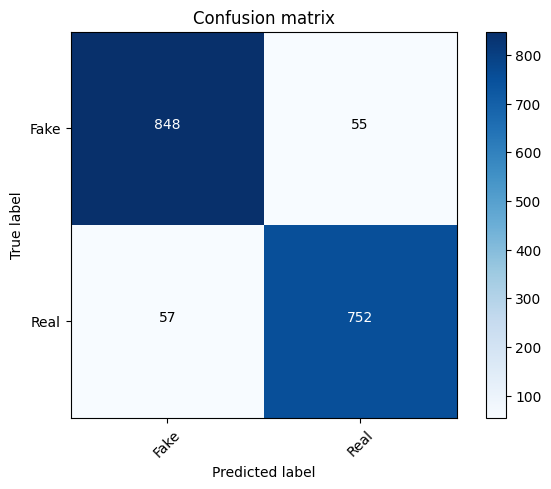

In [166]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

pipe = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', GradientBoostingClassifier(learning_rate=0.1,
                                              n_estimators=400,
                                             random_state=65))
    ])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Gradient Boost'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 89.37%


In [168]:
from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.92      0.87      0.90       903
        Real       0.86      0.92      0.89       809

    accuracy                           0.89      1712
   macro avg       0.89      0.90      0.89      1712
weighted avg       0.90      0.89      0.89      1712



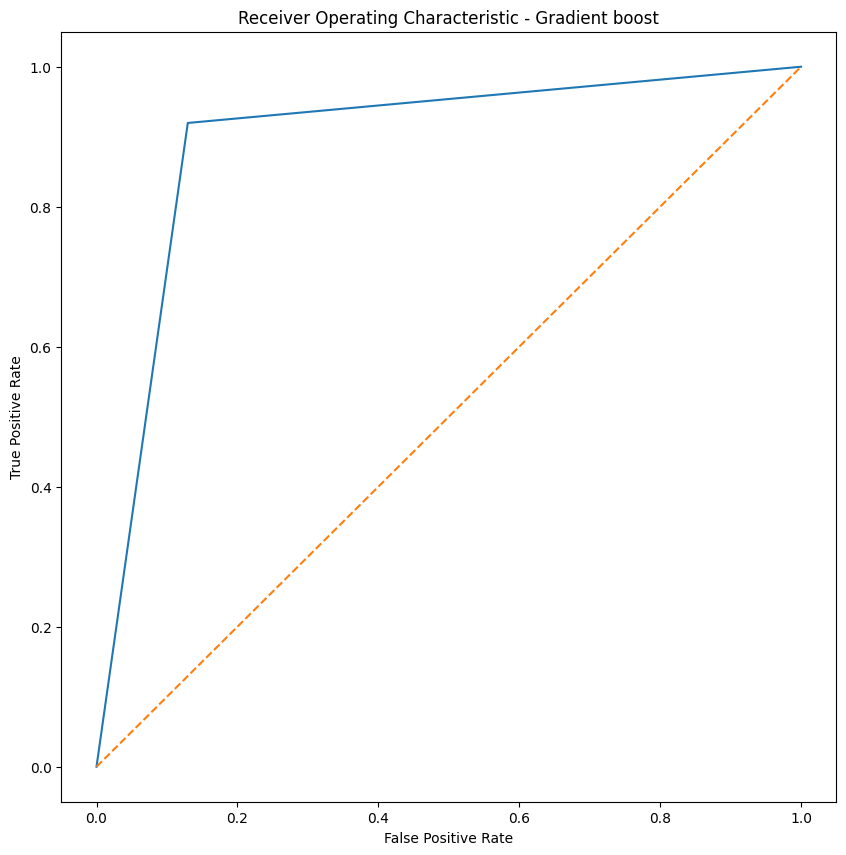

In [169]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,prediction,pos_label=1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Gradient boost')
plt.plot(fpr, tpr,'-')
plt.plot([0, 1], ls="--")
fpr_gb=fpr
tpr_gb=tpr
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


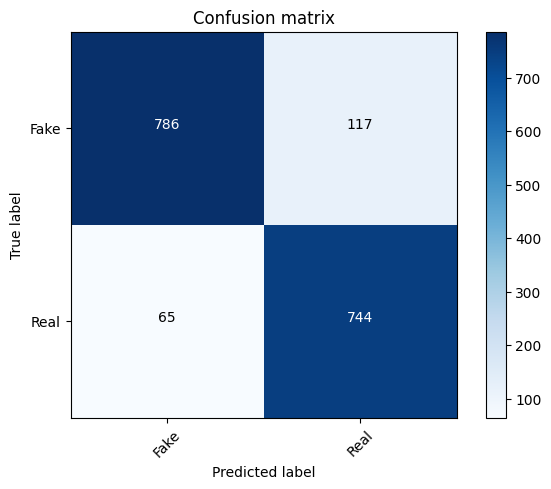

In [170]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

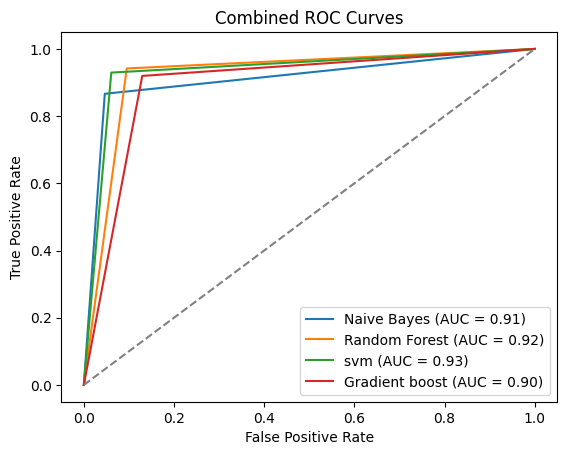

In [171]:
from sklearn.metrics import roc_auc_score
roc_curves = [
    ('Naive Bayes', (fpr_nb, tpr_nb)),
    ('Random Forest', (fpr_rf, tpr_rf)),
    ('svm', (fpr_svm, tpr_svm)),
    ('Gradient boost', (fpr_gb, tpr_gb))
]
def calculate_auc(tpr, fpr):
    # Sort the FPR and TPR in ascending order of FPR
    sorted_indices = sorted(range(len(fpr)), key=lambda k: fpr[k])
    sorted_fpr = [fpr[i] for i in sorted_indices]
    sorted_tpr = [tpr[i] for i in sorted_indices]

    # Calculate AUC using the trapezoidal rule
    auc = 0.0
    for i in range(1, len(sorted_fpr)):
        auc += 0.5 * (sorted_tpr[i] + sorted_tpr[i - 1]) * (sorted_fpr[i] - sorted_fpr[i - 1])

    return auc

for model_name, (fpr, tpr) in roc_curves:
  # Replace y_true and y_scores with your actual data
    auc = calculate_auc(tpr, fpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Plotting the diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves')
plt.legend()
plt.show()


([<matplotlib.axis.YTick at 0x7914a17bd090>,
 [Text(0, 65, '65'),
  Text(0, 70, '70'),
  Text(0, 75, '75'),
  Text(0, 80, '80'),
  Text(0, 85, '85'),
  Text(0, 90, '90'),
  Text(0, 95, '95'),
  Text(0, 100, '100')])

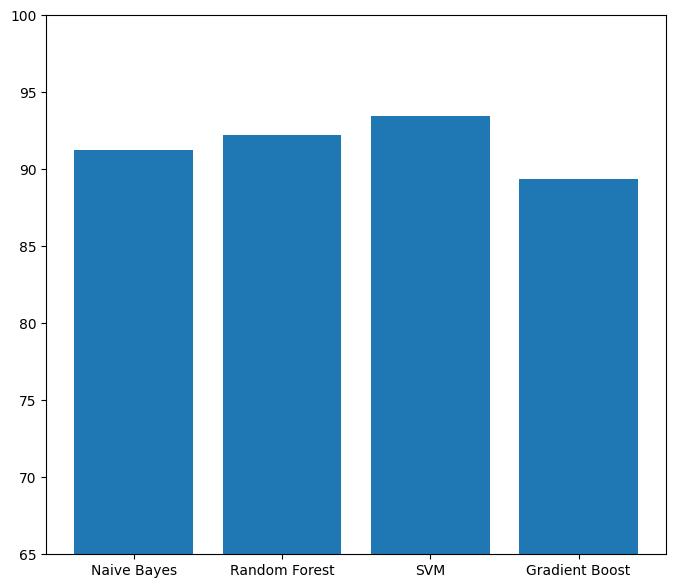

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((65,70, 75,80, 85,90, 95, 100))